# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
# Code Here
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
df_encoded = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,False,True,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [11]:
# Code Here
y = df_encoded.loc[:, "bill_depth_mm"]

X_a = df_encoded[["bill_length_mm", "sex_MALE"]]
X_b = df_encoded[["species_Chinstrap", "species_Gentoo", "body_mass_g"]]
X_c = df_encoded[["island_Dream", "island_Torgersen", "flipper_length_mm"]]
X_d = df_encoded.drop("bill_depth_mm", axis=1)

feature_groups = [X_a, X_b, X_c, X_d]
n_features = np.array([len(X_a.columns), len(X_b.columns), len(X_c.columns), len(X_d.columns)])


In [13]:

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_a, y, test_size=0.25)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y, test_size=0.25)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y, test_size=0.25)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_d, y, test_size=0.25)

lr = LinearRegression()

lr.fit(Xa_train, ya_train)
ya_pred_test = lr.predict(Xa_test)
ya_pred_train = lr.predict(Xa_train)
lr.fit(Xb_train, yb_train)
yb_pred_test = lr.predict(Xb_test)
yb_pred_train = lr.predict(Xb_train)
lr.fit(Xc_train, yc_train)
yc_pred_test = lr.predict(Xc_test)
yc_pred_train = lr.predict(Xc_train)
lr.fit(Xd_train, yd_train)
yd_pred_test = lr.predict(Xd_test)
yd_pred_train = lr.predict(Xd_train)
mse_train_vals = np.array([
    mean_squared_error(ya_train, ya_pred_train),
    mean_squared_error(yb_train, yb_pred_train),
    mean_squared_error(yc_train, yc_pred_train),
    mean_squared_error(yd_train, yd_pred_train)
], dtype=float)

mse_test_vals = np.array([
    mean_squared_error(ya_test, ya_pred_test),
    mean_squared_error(yb_test, yb_pred_test),
    mean_squared_error(yc_test, yc_pred_test),
    mean_squared_error(yd_test, yd_pred_test)
], dtype=float)

idx = np.argsort(n_features)
x_vals = n_features[idx]
train_err = mse_train_vals[idx]
test_err = mse_test_vals[idx]



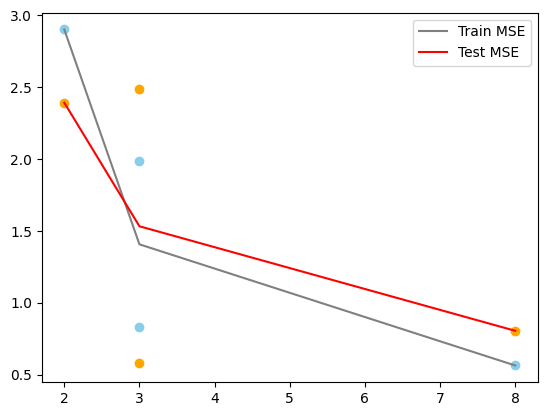

In [15]:
train_curve = np.poly1d(np.polyfit(x_vals, train_err, 2))
test_curve  = np.poly1d(np.polyfit(x_vals, test_err, 2))

plt.plot(x_vals, train_curve(x_vals), color="gray", label="Train MSE")
plt.plot(x_vals, test_curve(x_vals),  color="red",  label="Test MSE")

plt.scatter(x_vals, train_err, color="skyblue")
plt.scatter(x_vals, test_err,  color="orange")


plt.legend()
plt.show()
